In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


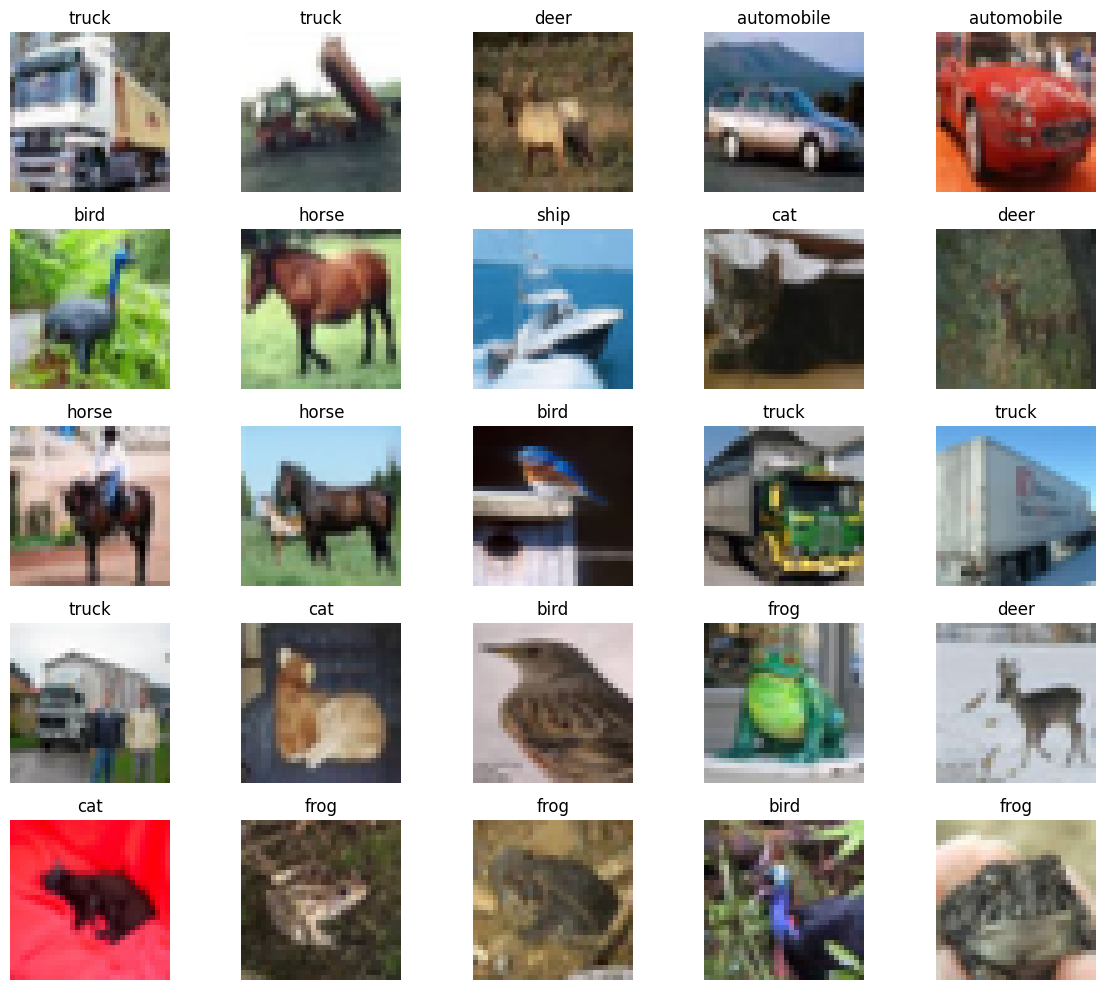

In [5]:
visualize_images(sample,(5,5))

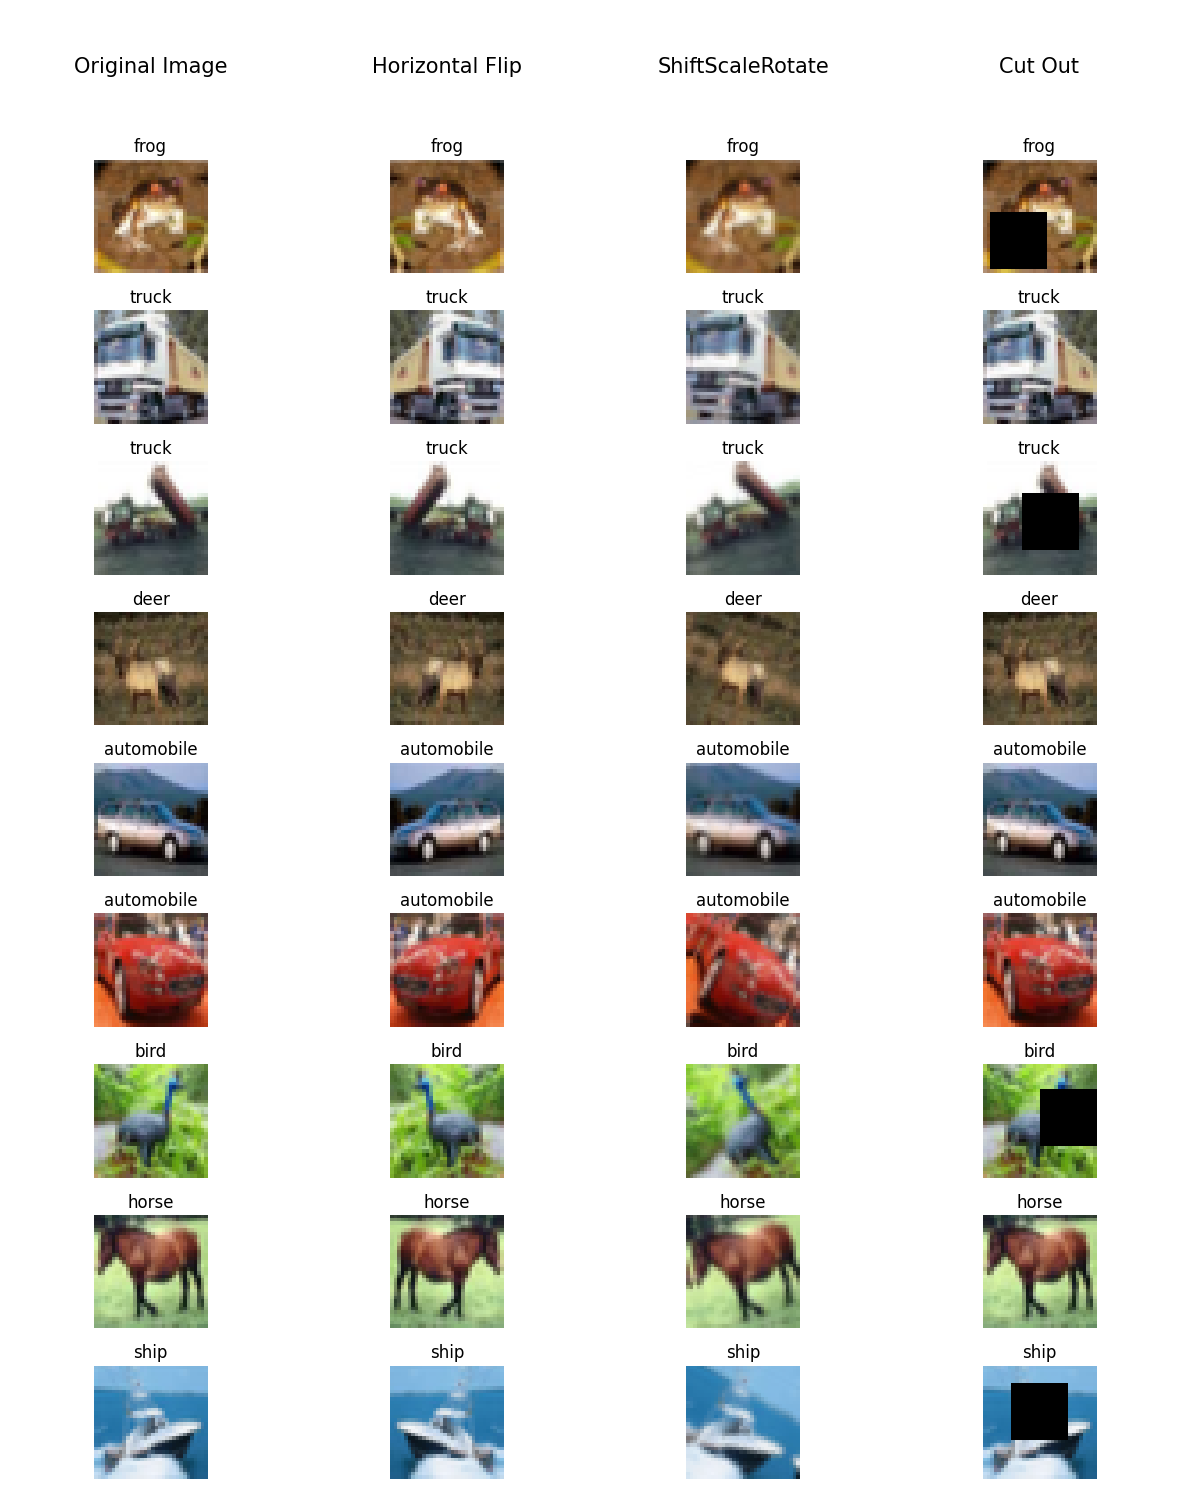

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'ShiftScaleRotate' : A.ShiftScaleRotate(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes = 1, max_height=16, max_width=16, min_holes = 1,
          min_height=16, min_width=16, fill_value=0.473363, mask_fill_value = None)
      }

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 34, 34]           2,048
           Conv2d-10           [-1, 28, 30, 30]           8,064
             ReLU-11           [-1, 28, 30, 30]               0
      BatchNorm2d-12           [-1, 28, 30, 30]              56
          Dropout-13           [-1, 28, 30, 30]               0
           Conv2d-14           [-1, 28,

In [9]:
training_parameters = {"learning_rate":0.001,
                       "momentum":0.7,
                       "max_lr":0.017,
                       "num_epochs":150,
                       "step_size":12,
                       "gamma":0.3

                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 1


Train: Loss=1.7183 Batch_id=1562 Accuracy=26.63: 100%|██████████| 1563/1563 [00:39<00:00, 39.44it/s]


Test set: Average loss: 1.6307, Accuracy: 3976/10000 (39.76%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 2


Train: Loss=1.5428 Batch_id=1562 Accuracy=37.46: 100%|██████████| 1563/1563 [00:38<00:00, 40.24it/s]


Test set: Average loss: 1.3966, Accuracy: 4883/10000 (48.83%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 3


Train: Loss=1.4814 Batch_id=1562 Accuracy=43.36: 100%|██████████| 1563/1563 [00:36<00:00, 42.41it/s]


Test set: Average loss: 1.1829, Accuracy: 5661/10000 (56.61%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 4


Train: Loss=1.8295 Batch_id=1562 Accuracy=47.53: 100%|██████████| 1563/1563 [00:36<00:00, 42.93it/s]


Test set: Average loss: 1.0717, Accuracy: 6142/10000 (61.42%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 5


Train: Loss=1.5639 Batch_id=1562 Accuracy=50.30: 100%|██████████| 1563/1563 [00:36<00:00, 43.39it/s]


Test set: Average loss: 1.0264, Accuracy: 6368/10000 (63.68%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 6


Train: Loss=1.4164 Batch_id=1562 Accuracy=52.28: 100%|██████████| 1563/1563 [00:36<00:00, 43.28it/s]


Test set: Average loss: 0.9576, Accuracy: 6589/10000 (65.89%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 7


Train: Loss=1.7669 Batch_id=1562 Accuracy=53.99: 100%|██████████| 1563/1563 [00:36<00:00, 42.46it/s]


Test set: Average loss: 0.9191, Accuracy: 6765/10000 (67.65%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 8


Train: Loss=0.9168 Batch_id=1562 Accuracy=55.93: 100%|██████████| 1563/1563 [00:37<00:00, 42.11it/s]


Test set: Average loss: 0.9133, Accuracy: 6742/10000 (67.42%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 9


Train: Loss=1.8427 Batch_id=1562 Accuracy=56.64: 100%|██████████| 1563/1563 [00:37<00:00, 41.80it/s]


Test set: Average loss: 0.8577, Accuracy: 7017/10000 (70.17%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 10


Train: Loss=1.2830 Batch_id=1562 Accuracy=58.05: 100%|██████████| 1563/1563 [00:37<00:00, 41.56it/s]


Test set: Average loss: 0.8359, Accuracy: 7087/10000 (70.87%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 11


Train: Loss=1.2032 Batch_id=1562 Accuracy=58.83: 100%|██████████| 1563/1563 [00:35<00:00, 43.59it/s]


Test set: Average loss: 0.8266, Accuracy: 7079/10000 (70.79%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 12


Train: Loss=0.7139 Batch_id=1562 Accuracy=59.59: 100%|██████████| 1563/1563 [00:37<00:00, 41.77it/s]


Test set: Average loss: 0.7801, Accuracy: 7264/10000 (72.64%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 13


Train: Loss=1.2997 Batch_id=1562 Accuracy=60.27: 100%|██████████| 1563/1563 [00:36<00:00, 42.85it/s]


Test set: Average loss: 0.7633, Accuracy: 7317/10000 (73.17%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 14


Train: Loss=1.3657 Batch_id=1562 Accuracy=61.09: 100%|██████████| 1563/1563 [00:36<00:00, 42.37it/s]


Test set: Average loss: 0.7572, Accuracy: 7350/10000 (73.50%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 15


Train: Loss=1.3495 Batch_id=1562 Accuracy=61.80: 100%|██████████| 1563/1563 [00:37<00:00, 41.45it/s]


Test set: Average loss: 0.7358, Accuracy: 7449/10000 (74.49%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 16


Train: Loss=1.2904 Batch_id=1562 Accuracy=62.14: 100%|██████████| 1563/1563 [00:36<00:00, 42.51it/s]


Test set: Average loss: 0.7236, Accuracy: 7502/10000 (75.02%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 17


Train: Loss=0.8054 Batch_id=1562 Accuracy=62.75: 100%|██████████| 1563/1563 [00:35<00:00, 43.68it/s]


Test set: Average loss: 0.7192, Accuracy: 7521/10000 (75.21%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 18


Train: Loss=1.1519 Batch_id=1562 Accuracy=63.46: 100%|██████████| 1563/1563 [00:37<00:00, 41.37it/s]


Test set: Average loss: 0.7299, Accuracy: 7492/10000 (74.92%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 19


Train: Loss=1.1696 Batch_id=1562 Accuracy=63.51: 100%|██████████| 1563/1563 [00:37<00:00, 41.37it/s]


Test set: Average loss: 0.6965, Accuracy: 7614/10000 (76.14%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 20


Train: Loss=1.4457 Batch_id=1562 Accuracy=63.85: 100%|██████████| 1563/1563 [00:36<00:00, 42.50it/s]


Test set: Average loss: 0.7116, Accuracy: 7539/10000 (75.39%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 21


Train: Loss=0.5807 Batch_id=1562 Accuracy=64.30: 100%|██████████| 1563/1563 [00:36<00:00, 42.76it/s]


Test set: Average loss: 0.6637, Accuracy: 7667/10000 (76.67%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 22


Train: Loss=1.0098 Batch_id=1562 Accuracy=64.80: 100%|██████████| 1563/1563 [00:36<00:00, 42.81it/s]


Test set: Average loss: 0.6511, Accuracy: 7727/10000 (77.27%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 23


Train: Loss=0.9830 Batch_id=1562 Accuracy=65.15: 100%|██████████| 1563/1563 [00:36<00:00, 43.02it/s]


Test set: Average loss: 0.6570, Accuracy: 7738/10000 (77.38%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 24


Train: Loss=0.8790 Batch_id=1562 Accuracy=65.71: 100%|██████████| 1563/1563 [00:36<00:00, 42.63it/s]


Test set: Average loss: 0.6474, Accuracy: 7765/10000 (77.65%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 25


Train: Loss=1.0380 Batch_id=1562 Accuracy=65.57: 100%|██████████| 1563/1563 [00:37<00:00, 41.53it/s]


Test set: Average loss: 0.6475, Accuracy: 7755/10000 (77.55%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 26


Train: Loss=1.5642 Batch_id=1562 Accuracy=65.84: 100%|██████████| 1563/1563 [00:37<00:00, 41.97it/s]


Test set: Average loss: 0.6350, Accuracy: 7829/10000 (78.29%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 27


Train: Loss=1.0427 Batch_id=1562 Accuracy=66.28: 100%|██████████| 1563/1563 [00:37<00:00, 42.15it/s]


Test set: Average loss: 0.6472, Accuracy: 7790/10000 (77.90%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 28


Train: Loss=0.7992 Batch_id=1562 Accuracy=66.47: 100%|██████████| 1563/1563 [00:37<00:00, 41.26it/s]


Test set: Average loss: 0.6244, Accuracy: 7861/10000 (78.61%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 29


Train: Loss=1.4007 Batch_id=1562 Accuracy=66.94: 100%|██████████| 1563/1563 [00:37<00:00, 42.07it/s]


Test set: Average loss: 0.6173, Accuracy: 7856/10000 (78.56%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 30


Train: Loss=1.0325 Batch_id=1562 Accuracy=67.07: 100%|██████████| 1563/1563 [00:38<00:00, 40.87it/s]


Test set: Average loss: 0.6116, Accuracy: 7890/10000 (78.90%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 31


Train: Loss=1.6576 Batch_id=1562 Accuracy=67.07: 100%|██████████| 1563/1563 [00:36<00:00, 42.38it/s]


Test set: Average loss: 0.6083, Accuracy: 7909/10000 (79.09%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 32


Train: Loss=0.5660 Batch_id=1562 Accuracy=67.75: 100%|██████████| 1563/1563 [00:37<00:00, 41.14it/s]


Test set: Average loss: 0.5978, Accuracy: 7945/10000 (79.45%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 33


Train: Loss=0.7962 Batch_id=1562 Accuracy=67.57: 100%|██████████| 1563/1563 [00:39<00:00, 39.74it/s]


Test set: Average loss: 0.5884, Accuracy: 7955/10000 (79.55%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 34


Train: Loss=0.9439 Batch_id=1562 Accuracy=67.85: 100%|██████████| 1563/1563 [00:37<00:00, 42.05it/s]


Test set: Average loss: 0.5944, Accuracy: 7980/10000 (79.80%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 35


Train: Loss=0.9141 Batch_id=1562 Accuracy=68.12: 100%|██████████| 1563/1563 [00:38<00:00, 40.96it/s]


Test set: Average loss: 0.5861, Accuracy: 8034/10000 (80.34%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 36


Train: Loss=0.4716 Batch_id=1562 Accuracy=68.33: 100%|██████████| 1563/1563 [00:38<00:00, 40.13it/s]


Test set: Average loss: 0.5847, Accuracy: 8013/10000 (80.13%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 37


Train: Loss=0.6553 Batch_id=1562 Accuracy=68.17: 100%|██████████| 1563/1563 [00:39<00:00, 39.10it/s]


Test set: Average loss: 0.5707, Accuracy: 8046/10000 (80.46%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 38


Train: Loss=1.0986 Batch_id=1562 Accuracy=68.40: 100%|██████████| 1563/1563 [00:38<00:00, 40.44it/s]


Test set: Average loss: 0.5827, Accuracy: 8004/10000 (80.04%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 39


Train: Loss=1.2384 Batch_id=1562 Accuracy=68.77: 100%|██████████| 1563/1563 [00:37<00:00, 42.01it/s]


Test set: Average loss: 0.5869, Accuracy: 8016/10000 (80.16%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 40


Train: Loss=0.6449 Batch_id=1562 Accuracy=69.15: 100%|██████████| 1563/1563 [00:39<00:00, 40.01it/s]


Test set: Average loss: 0.5749, Accuracy: 8071/10000 (80.71%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 41


Train: Loss=0.8542 Batch_id=1562 Accuracy=68.97: 100%|██████████| 1563/1563 [00:37<00:00, 41.86it/s]


Test set: Average loss: 0.5599, Accuracy: 8077/10000 (80.77%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 42


Train: Loss=1.2103 Batch_id=1562 Accuracy=69.47: 100%|██████████| 1563/1563 [00:37<00:00, 41.90it/s]


Test set: Average loss: 0.5609, Accuracy: 8063/10000 (80.63%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 43


Train: Loss=0.3146 Batch_id=1562 Accuracy=69.31: 100%|██████████| 1563/1563 [00:38<00:00, 41.07it/s]


Test set: Average loss: 0.5452, Accuracy: 8129/10000 (81.29%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 44


Train: Loss=0.4695 Batch_id=1562 Accuracy=69.36: 100%|██████████| 1563/1563 [00:37<00:00, 41.89it/s]


Test set: Average loss: 0.5552, Accuracy: 8097/10000 (80.97%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 45


Train: Loss=0.5197 Batch_id=1562 Accuracy=69.53: 100%|██████████| 1563/1563 [00:37<00:00, 41.42it/s]


Test set: Average loss: 0.5517, Accuracy: 8099/10000 (80.99%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 46


Train: Loss=1.1904 Batch_id=1562 Accuracy=69.77: 100%|██████████| 1563/1563 [00:38<00:00, 40.44it/s]


Test set: Average loss: 0.5578, Accuracy: 8097/10000 (80.97%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 47


Train: Loss=0.3897 Batch_id=1562 Accuracy=70.37: 100%|██████████| 1563/1563 [00:38<00:00, 40.80it/s]


Test set: Average loss: 0.5649, Accuracy: 8082/10000 (80.82%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 48


Train: Loss=1.1286 Batch_id=1562 Accuracy=69.81: 100%|██████████| 1563/1563 [00:37<00:00, 41.64it/s]


Test set: Average loss: 0.5425, Accuracy: 8151/10000 (81.51%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 49


Train: Loss=0.8835 Batch_id=1562 Accuracy=70.20: 100%|██████████| 1563/1563 [00:39<00:00, 39.23it/s]


Test set: Average loss: 0.5329, Accuracy: 8166/10000 (81.66%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 50


Train: Loss=1.3911 Batch_id=1562 Accuracy=70.22: 100%|██████████| 1563/1563 [00:37<00:00, 41.29it/s]


Test set: Average loss: 0.5645, Accuracy: 8092/10000 (80.92%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 51


Train: Loss=0.6732 Batch_id=1562 Accuracy=70.15: 100%|██████████| 1563/1563 [00:39<00:00, 39.85it/s]


Test set: Average loss: 0.5320, Accuracy: 8188/10000 (81.88%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 52


Train: Loss=1.0831 Batch_id=1562 Accuracy=70.62: 100%|██████████| 1563/1563 [00:39<00:00, 39.26it/s]


Test set: Average loss: 0.5512, Accuracy: 8097/10000 (80.97%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 53


Train: Loss=0.7796 Batch_id=1562 Accuracy=70.54: 100%|██████████| 1563/1563 [00:38<00:00, 41.02it/s]


Test set: Average loss: 0.5386, Accuracy: 8145/10000 (81.45%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 54


Train: Loss=0.8580 Batch_id=1562 Accuracy=70.47: 100%|██████████| 1563/1563 [00:39<00:00, 39.18it/s]


Test set: Average loss: 0.5209, Accuracy: 8219/10000 (82.19%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 55


Train: Loss=0.7845 Batch_id=1562 Accuracy=70.80: 100%|██████████| 1563/1563 [00:37<00:00, 41.62it/s]


Test set: Average loss: 0.5445, Accuracy: 8137/10000 (81.37%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 56


Train: Loss=0.3452 Batch_id=1562 Accuracy=70.34: 100%|██████████| 1563/1563 [00:37<00:00, 41.22it/s]


Test set: Average loss: 0.5209, Accuracy: 8236/10000 (82.36%)

Adjusting learning rate of group 0 to 6.8003e-04.
Epoch 57


Train: Loss=0.6310 Batch_id=1562 Accuracy=70.86: 100%|██████████| 1563/1563 [00:38<00:00, 40.27it/s]


Test set: Average loss: 0.5196, Accuracy: 8212/10000 (82.12%)

Adjusting learning rate of group 0 to 6.8003e-04.
Epoch 58


Train: Loss=0.9872 Batch_id=1562 Accuracy=71.07: 100%|██████████| 1563/1563 [00:37<00:00, 41.72it/s]


Test set: Average loss: 0.5397, Accuracy: 8184/10000 (81.84%)

Adjusting learning rate of group 0 to 6.8003e-04.
Epoch 59


Train: Loss=0.8691 Batch_id=1562 Accuracy=71.49: 100%|██████████| 1563/1563 [00:37<00:00, 41.37it/s]


Test set: Average loss: 0.5318, Accuracy: 8185/10000 (81.85%)

Adjusting learning rate of group 0 to 6.8003e-04.
Epoch 60


Train: Loss=0.3829 Batch_id=1562 Accuracy=71.29: 100%|██████████| 1563/1563 [00:37<00:00, 41.24it/s]


Test set: Average loss: 0.5172, Accuracy: 8220/10000 (82.20%)

Adjusting learning rate of group 0 to 6.8003e-04.
Epoch 61


Train: Loss=1.1429 Batch_id=1562 Accuracy=71.25: 100%|██████████| 1563/1563 [00:38<00:00, 40.24it/s]


Test set: Average loss: 0.5145, Accuracy: 8232/10000 (82.32%)

Adjusting learning rate of group 0 to 6.8003e-04.
Epoch 62


Train: Loss=1.3756 Batch_id=1562 Accuracy=71.62: 100%|██████████| 1563/1563 [00:37<00:00, 41.37it/s]


Test set: Average loss: 0.5178, Accuracy: 8211/10000 (82.11%)

Adjusting learning rate of group 0 to 6.8003e-04.
Epoch 63


Train: Loss=0.8540 Batch_id=1562 Accuracy=71.46: 100%|██████████| 1563/1563 [00:38<00:00, 41.06it/s]


Test set: Average loss: 0.5285, Accuracy: 8237/10000 (82.37%)

Adjusting learning rate of group 0 to 6.8003e-04.
Epoch 64


Train: Loss=0.4742 Batch_id=1562 Accuracy=71.90: 100%|██████████| 1563/1563 [00:38<00:00, 40.13it/s]


Test set: Average loss: 0.5071, Accuracy: 8256/10000 (82.56%)

Adjusting learning rate of group 0 to 6.8003e-04.
Epoch 65


Train: Loss=0.6983 Batch_id=1562 Accuracy=71.85: 100%|██████████| 1563/1563 [00:39<00:00, 40.07it/s]


Test set: Average loss: 0.5107, Accuracy: 8273/10000 (82.73%)

Adjusting learning rate of group 0 to 6.8003e-04.
Epoch 66


Train: Loss=0.6772 Batch_id=1562 Accuracy=71.50: 100%|██████████| 1563/1563 [00:39<00:00, 39.28it/s]


Test set: Average loss: 0.4991, Accuracy: 8315/10000 (83.15%)

Adjusting learning rate of group 0 to 6.8004e-04.
Epoch 67


Train: Loss=0.5217 Batch_id=1562 Accuracy=71.95: 100%|██████████| 1563/1563 [00:41<00:00, 38.01it/s]


Test set: Average loss: 0.5222, Accuracy: 8181/10000 (81.81%)

Adjusting learning rate of group 0 to 6.8004e-04.
Epoch 68


Train: Loss=0.7815 Batch_id=1562 Accuracy=71.93: 100%|██████████| 1563/1563 [00:40<00:00, 38.90it/s]


Test set: Average loss: 0.5110, Accuracy: 8241/10000 (82.41%)

Adjusting learning rate of group 0 to 6.8004e-04.
Epoch 69


Train: Loss=0.4203 Batch_id=1562 Accuracy=71.86: 100%|██████████| 1563/1563 [00:41<00:00, 37.31it/s]


Test set: Average loss: 0.4964, Accuracy: 8291/10000 (82.91%)

Adjusting learning rate of group 0 to 6.8004e-04.
Epoch 70


Train: Loss=1.0149 Batch_id=1562 Accuracy=72.12: 100%|██████████| 1563/1563 [00:41<00:00, 37.33it/s]


Test set: Average loss: 0.5039, Accuracy: 8314/10000 (83.14%)

Adjusting learning rate of group 0 to 6.8004e-04.
Epoch 71


Train: Loss=0.9866 Batch_id=1562 Accuracy=72.05: 100%|██████████| 1563/1563 [00:41<00:00, 37.32it/s]


Test set: Average loss: 0.4965, Accuracy: 8330/10000 (83.30%)

Adjusting learning rate of group 0 to 6.8004e-04.
Epoch 72


Train: Loss=0.5372 Batch_id=1562 Accuracy=72.30: 100%|██████████| 1563/1563 [00:41<00:00, 37.27it/s]


Test set: Average loss: 0.4894, Accuracy: 8329/10000 (83.29%)

Adjusting learning rate of group 0 to 6.8004e-04.
Epoch 73


Train: Loss=0.6345 Batch_id=1562 Accuracy=72.51: 100%|██████████| 1563/1563 [00:44<00:00, 35.42it/s]


Test set: Average loss: 0.5137, Accuracy: 8269/10000 (82.69%)

Adjusting learning rate of group 0 to 6.8004e-04.
Epoch 74


Train: Loss=0.6017 Batch_id=1562 Accuracy=72.26: 100%|██████████| 1563/1563 [00:42<00:00, 37.19it/s]


Test set: Average loss: 0.4813, Accuracy: 8336/10000 (83.36%)

Adjusting learning rate of group 0 to 6.8004e-04.
Epoch 75


Train: Loss=0.6435 Batch_id=1562 Accuracy=72.39: 100%|██████████| 1563/1563 [00:43<00:00, 36.22it/s]


Test set: Average loss: 0.4888, Accuracy: 8328/10000 (83.28%)

Adjusting learning rate of group 0 to 6.8005e-04.
Epoch 76


Train: Loss=1.2952 Batch_id=1562 Accuracy=72.12: 100%|██████████| 1563/1563 [00:41<00:00, 37.51it/s]


Test set: Average loss: 0.4901, Accuracy: 8309/10000 (83.09%)

Adjusting learning rate of group 0 to 6.8005e-04.
Epoch 77


Train: Loss=1.3167 Batch_id=1562 Accuracy=72.44: 100%|██████████| 1563/1563 [00:41<00:00, 37.52it/s]


Test set: Average loss: 0.4850, Accuracy: 8370/10000 (83.70%)

Adjusting learning rate of group 0 to 6.8005e-04.
Epoch 78


Train: Loss=0.8982 Batch_id=1562 Accuracy=72.84: 100%|██████████| 1563/1563 [00:42<00:00, 37.07it/s]


Test set: Average loss: 0.5121, Accuracy: 8270/10000 (82.70%)

Adjusting learning rate of group 0 to 6.8005e-04.
Epoch 79


Train: Loss=0.6189 Batch_id=1562 Accuracy=72.67: 100%|██████████| 1563/1563 [00:43<00:00, 35.95it/s]


Test set: Average loss: 0.4900, Accuracy: 8343/10000 (83.43%)

Adjusting learning rate of group 0 to 6.8005e-04.
Epoch 80


Train: Loss=0.9716 Batch_id=1562 Accuracy=72.96: 100%|██████████| 1563/1563 [00:42<00:00, 37.20it/s]


Test set: Average loss: 0.4977, Accuracy: 8300/10000 (83.00%)

Adjusting learning rate of group 0 to 6.8005e-04.
Epoch 81


Train: Loss=0.7372 Batch_id=1562 Accuracy=72.88: 100%|██████████| 1563/1563 [00:42<00:00, 37.19it/s]


Test set: Average loss: 0.5097, Accuracy: 8273/10000 (82.73%)

Adjusting learning rate of group 0 to 6.8005e-04.
Epoch 82


Train: Loss=0.6545 Batch_id=1562 Accuracy=73.07: 100%|██████████| 1563/1563 [00:41<00:00, 37.27it/s]


Test set: Average loss: 0.4940, Accuracy: 8311/10000 (83.11%)

Adjusting learning rate of group 0 to 6.8005e-04.
Epoch 83


Train: Loss=0.4723 Batch_id=1562 Accuracy=73.00: 100%|██████████| 1563/1563 [00:41<00:00, 37.35it/s]


Test set: Average loss: 0.4820, Accuracy: 8363/10000 (83.63%)

Adjusting learning rate of group 0 to 6.8006e-04.
Epoch 84


Train: Loss=0.3794 Batch_id=1562 Accuracy=72.98: 100%|██████████| 1563/1563 [00:42<00:00, 37.16it/s]


Test set: Average loss: 0.4827, Accuracy: 8315/10000 (83.15%)

Adjusting learning rate of group 0 to 6.8006e-04.
Epoch 85


Train: Loss=0.6577 Batch_id=1562 Accuracy=73.37: 100%|██████████| 1563/1563 [00:43<00:00, 35.79it/s]


Test set: Average loss: 0.4872, Accuracy: 8311/10000 (83.11%)

Adjusting learning rate of group 0 to 6.8006e-04.
Epoch 86


Train: Loss=1.3888 Batch_id=1562 Accuracy=73.24: 100%|██████████| 1563/1563 [00:41<00:00, 37.92it/s]


Test set: Average loss: 0.4733, Accuracy: 8363/10000 (83.63%)

Adjusting learning rate of group 0 to 6.8006e-04.
Epoch 87


Train: Loss=0.9519 Batch_id=1562 Accuracy=72.90: 100%|██████████| 1563/1563 [00:42<00:00, 36.93it/s]


Test set: Average loss: 0.4801, Accuracy: 8381/10000 (83.81%)

Adjusting learning rate of group 0 to 6.8006e-04.
Epoch 88


Train: Loss=0.5453 Batch_id=1562 Accuracy=73.24: 100%|██████████| 1563/1563 [00:41<00:00, 38.08it/s]


Test set: Average loss: 0.4689, Accuracy: 8393/10000 (83.93%)

Adjusting learning rate of group 0 to 6.8006e-04.
Epoch 89


Train: Loss=1.3328 Batch_id=1562 Accuracy=73.42: 100%|██████████| 1563/1563 [00:41<00:00, 37.71it/s]


Test set: Average loss: 0.4674, Accuracy: 8414/10000 (84.14%)

Adjusting learning rate of group 0 to 6.8006e-04.
Epoch 90


Train: Loss=1.0251 Batch_id=1562 Accuracy=73.56: 100%|██████████| 1563/1563 [00:43<00:00, 36.02it/s]


Test set: Average loss: 0.4713, Accuracy: 8414/10000 (84.14%)

Adjusting learning rate of group 0 to 6.8007e-04.
Epoch 91


Train: Loss=0.6688 Batch_id=1562 Accuracy=73.45: 100%|██████████| 1563/1563 [00:42<00:00, 36.85it/s]


Test set: Average loss: 0.4811, Accuracy: 8373/10000 (83.73%)

Adjusting learning rate of group 0 to 6.8007e-04.
Epoch 92


Train: Loss=0.9984 Batch_id=1562 Accuracy=73.64: 100%|██████████| 1563/1563 [00:41<00:00, 37.62it/s]


Test set: Average loss: 0.4784, Accuracy: 8338/10000 (83.38%)

Adjusting learning rate of group 0 to 6.8007e-04.
Epoch 93


Train: Loss=1.0980 Batch_id=1562 Accuracy=73.51: 100%|██████████| 1563/1563 [00:43<00:00, 35.71it/s]


Test set: Average loss: 0.4775, Accuracy: 8384/10000 (83.84%)

Adjusting learning rate of group 0 to 6.8007e-04.
Epoch 94


Train: Loss=1.0017 Batch_id=1562 Accuracy=73.70: 100%|██████████| 1563/1563 [00:41<00:00, 38.02it/s]


Test set: Average loss: 0.4876, Accuracy: 8357/10000 (83.57%)

Adjusting learning rate of group 0 to 6.8007e-04.
Epoch 95


Train: Loss=0.5363 Batch_id=1562 Accuracy=73.74: 100%|██████████| 1563/1563 [00:42<00:00, 36.40it/s]


Test set: Average loss: 0.4592, Accuracy: 8406/10000 (84.06%)

Adjusting learning rate of group 0 to 6.8007e-04.
Epoch 96


Train: Loss=0.7752 Batch_id=1562 Accuracy=73.75: 100%|██████████| 1563/1563 [00:42<00:00, 36.49it/s]


Test set: Average loss: 0.4897, Accuracy: 8353/10000 (83.53%)

Adjusting learning rate of group 0 to 6.8008e-04.
Epoch 97


Train: Loss=1.1941 Batch_id=1562 Accuracy=73.57: 100%|██████████| 1563/1563 [00:42<00:00, 36.63it/s]


Test set: Average loss: 0.4582, Accuracy: 8425/10000 (84.25%)

Adjusting learning rate of group 0 to 6.8008e-04.
Epoch 98


Train: Loss=0.9596 Batch_id=1562 Accuracy=73.76: 100%|██████████| 1563/1563 [00:41<00:00, 37.45it/s]


Test set: Average loss: 0.4691, Accuracy: 8402/10000 (84.02%)

Adjusting learning rate of group 0 to 6.8008e-04.
Epoch 99


Train: Loss=0.9402 Batch_id=1562 Accuracy=73.81: 100%|██████████| 1563/1563 [00:42<00:00, 36.41it/s]


Test set: Average loss: 0.4607, Accuracy: 8430/10000 (84.30%)

Adjusting learning rate of group 0 to 6.8008e-04.
Epoch 100


Train: Loss=0.6022 Batch_id=1562 Accuracy=73.75: 100%|██████████| 1563/1563 [00:40<00:00, 38.21it/s]


Test set: Average loss: 0.4595, Accuracy: 8439/10000 (84.39%)

Adjusting learning rate of group 0 to 6.8008e-04.
Epoch 101


Train: Loss=1.0742 Batch_id=1562 Accuracy=73.92: 100%|██████████| 1563/1563 [00:44<00:00, 34.89it/s]


Test set: Average loss: 0.4677, Accuracy: 8424/10000 (84.24%)

Adjusting learning rate of group 0 to 6.8008e-04.
Epoch 102


Train: Loss=0.8478 Batch_id=1562 Accuracy=74.12: 100%|██████████| 1563/1563 [00:42<00:00, 36.50it/s]


Test set: Average loss: 0.4562, Accuracy: 8443/10000 (84.43%)

Adjusting learning rate of group 0 to 6.8008e-04.
Epoch 103


Train: Loss=1.0209 Batch_id=1562 Accuracy=73.98: 100%|██████████| 1563/1563 [00:45<00:00, 34.08it/s]


Test set: Average loss: 0.4684, Accuracy: 8432/10000 (84.32%)

Adjusting learning rate of group 0 to 6.8009e-04.
Epoch 104


Train: Loss=0.8459 Batch_id=1562 Accuracy=74.26: 100%|██████████| 1563/1563 [00:43<00:00, 35.85it/s]


Test set: Average loss: 0.4543, Accuracy: 8444/10000 (84.44%)

Adjusting learning rate of group 0 to 6.8009e-04.
Epoch 105


Train: Loss=0.6396 Batch_id=1562 Accuracy=74.09: 100%|██████████| 1563/1563 [00:42<00:00, 36.84it/s]


Test set: Average loss: 0.4585, Accuracy: 8400/10000 (84.00%)

Adjusting learning rate of group 0 to 6.8009e-04.
Epoch 106


Train: Loss=1.1900 Batch_id=1562 Accuracy=74.11: 100%|██████████| 1563/1563 [00:42<00:00, 36.77it/s]


Test set: Average loss: 0.4632, Accuracy: 8406/10000 (84.06%)

Adjusting learning rate of group 0 to 6.8009e-04.
Epoch 107


Train: Loss=1.0117 Batch_id=1562 Accuracy=74.28: 100%|██████████| 1563/1563 [00:42<00:00, 36.45it/s]


Test set: Average loss: 0.4540, Accuracy: 8424/10000 (84.24%)

Adjusting learning rate of group 0 to 6.8009e-04.
Epoch 108


Train: Loss=0.7413 Batch_id=1562 Accuracy=74.27: 100%|██████████| 1563/1563 [00:43<00:00, 36.23it/s]


Test set: Average loss: 0.4634, Accuracy: 8429/10000 (84.29%)

Adjusting learning rate of group 0 to 6.8009e-04.
Epoch 109


Train: Loss=1.4536 Batch_id=1562 Accuracy=74.53: 100%|██████████| 1563/1563 [00:43<00:00, 36.21it/s]


Test set: Average loss: 0.4662, Accuracy: 8400/10000 (84.00%)

Adjusting learning rate of group 0 to 6.8010e-04.
Epoch 110


Train: Loss=0.7534 Batch_id=1562 Accuracy=74.44: 100%|██████████| 1563/1563 [00:43<00:00, 35.56it/s]


Test set: Average loss: 0.4566, Accuracy: 8421/10000 (84.21%)

Adjusting learning rate of group 0 to 6.8010e-04.
Epoch 111


Train: Loss=0.7276 Batch_id=1562 Accuracy=74.55: 100%|██████████| 1563/1563 [00:43<00:00, 36.30it/s]


Test set: Average loss: 0.4681, Accuracy: 8386/10000 (83.86%)

Adjusting learning rate of group 0 to 6.8010e-04.
Epoch 112


Train: Loss=0.4569 Batch_id=1562 Accuracy=74.77: 100%|██████████| 1563/1563 [00:43<00:00, 36.16it/s]


Test set: Average loss: 0.4562, Accuracy: 8427/10000 (84.27%)

Adjusting learning rate of group 0 to 6.8010e-04.
Epoch 113


Train: Loss=0.8010 Batch_id=1562 Accuracy=74.83: 100%|██████████| 1563/1563 [00:44<00:00, 35.08it/s]


Test set: Average loss: 0.4604, Accuracy: 8439/10000 (84.39%)

Adjusting learning rate of group 0 to 6.8010e-04.
Epoch 114


Train: Loss=0.4894 Batch_id=1562 Accuracy=74.53: 100%|██████████| 1563/1563 [00:44<00:00, 35.35it/s]


Test set: Average loss: 0.4585, Accuracy: 8416/10000 (84.16%)

Adjusting learning rate of group 0 to 6.8011e-04.
Epoch 115


Train: Loss=1.0824 Batch_id=1562 Accuracy=74.62: 100%|██████████| 1563/1563 [00:44<00:00, 35.33it/s]


Test set: Average loss: 0.4567, Accuracy: 8433/10000 (84.33%)

Adjusting learning rate of group 0 to 6.8011e-04.
Epoch 116


Train: Loss=0.5802 Batch_id=1562 Accuracy=74.38: 100%|██████████| 1563/1563 [00:45<00:00, 34.54it/s]


Test set: Average loss: 0.4465, Accuracy: 8446/10000 (84.46%)

Adjusting learning rate of group 0 to 6.8011e-04.
Epoch 117


Train: Loss=0.5663 Batch_id=1562 Accuracy=74.66: 100%|██████████| 1563/1563 [00:43<00:00, 36.10it/s]


Test set: Average loss: 0.4487, Accuracy: 8441/10000 (84.41%)

Adjusting learning rate of group 0 to 6.8011e-04.
Epoch 118


Train: Loss=0.7780 Batch_id=1562 Accuracy=74.65: 100%|██████████| 1563/1563 [00:42<00:00, 36.62it/s]


Test set: Average loss: 0.4441, Accuracy: 8455/10000 (84.55%)

Adjusting learning rate of group 0 to 6.8011e-04.
Epoch 119


Train: Loss=0.8540 Batch_id=1562 Accuracy=74.71: 100%|██████████| 1563/1563 [00:43<00:00, 35.67it/s]


Test set: Average loss: 0.4436, Accuracy: 8477/10000 (84.77%)

Adjusting learning rate of group 0 to 6.8012e-04.
Epoch 120


Train: Loss=0.6011 Batch_id=1562 Accuracy=74.79: 100%|██████████| 1563/1563 [00:45<00:00, 34.70it/s]


Test set: Average loss: 0.4570, Accuracy: 8381/10000 (83.81%)

Adjusting learning rate of group 0 to 6.8012e-04.
Epoch 121


Train: Loss=0.2890 Batch_id=1562 Accuracy=75.02: 100%|██████████| 1563/1563 [00:42<00:00, 36.94it/s]


Test set: Average loss: 0.4477, Accuracy: 8432/10000 (84.32%)

Adjusting learning rate of group 0 to 6.8012e-04.
Epoch 122


Train: Loss=0.4171 Batch_id=1562 Accuracy=75.17: 100%|██████████| 1563/1563 [00:42<00:00, 36.49it/s]


Test set: Average loss: 0.4427, Accuracy: 8490/10000 (84.90%)

Adjusting learning rate of group 0 to 6.8012e-04.
Epoch 123


Train: Loss=0.5739 Batch_id=1562 Accuracy=74.92: 100%|██████████| 1563/1563 [00:43<00:00, 36.29it/s]


Test set: Average loss: 0.4468, Accuracy: 8463/10000 (84.63%)

Adjusting learning rate of group 0 to 6.8012e-04.
Epoch 124


Train: Loss=0.8914 Batch_id=1562 Accuracy=74.94: 100%|██████████| 1563/1563 [00:46<00:00, 33.77it/s]


Test set: Average loss: 0.4342, Accuracy: 8494/10000 (84.94%)

Adjusting learning rate of group 0 to 6.8013e-04.
Epoch 125


Train: Loss=0.4554 Batch_id=1562 Accuracy=74.74: 100%|██████████| 1563/1563 [00:44<00:00, 35.22it/s]


Test set: Average loss: 0.4442, Accuracy: 8462/10000 (84.62%)

Adjusting learning rate of group 0 to 6.8013e-04.
Epoch 126


Train: Loss=0.4486 Batch_id=1562 Accuracy=74.94: 100%|██████████| 1563/1563 [00:43<00:00, 35.75it/s]


Test set: Average loss: 0.4520, Accuracy: 8476/10000 (84.76%)

Adjusting learning rate of group 0 to 6.8013e-04.
Epoch 127


Train: Loss=0.4660 Batch_id=1562 Accuracy=75.07: 100%|██████████| 1563/1563 [00:43<00:00, 36.04it/s]


Test set: Average loss: 0.4503, Accuracy: 8468/10000 (84.68%)

Adjusting learning rate of group 0 to 6.8013e-04.
Epoch 128


Train: Loss=0.7267 Batch_id=1562 Accuracy=75.15: 100%|██████████| 1563/1563 [00:43<00:00, 35.96it/s]


Test set: Average loss: 0.4517, Accuracy: 8461/10000 (84.61%)

Adjusting learning rate of group 0 to 6.8013e-04.
Epoch 129


Train: Loss=0.9539 Batch_id=1562 Accuracy=75.07: 100%|██████████| 1563/1563 [00:43<00:00, 35.60it/s]


Test set: Average loss: 0.4423, Accuracy: 8507/10000 (85.07%)

Adjusting learning rate of group 0 to 6.8014e-04.
Epoch 130


Train: Loss=0.8308 Batch_id=1562 Accuracy=75.26: 100%|██████████| 1563/1563 [00:43<00:00, 36.17it/s]


Test set: Average loss: 0.4443, Accuracy: 8517/10000 (85.17%)

Adjusting learning rate of group 0 to 6.8014e-04.
Epoch 131


Train: Loss=1.2325 Batch_id=1562 Accuracy=75.18: 100%|██████████| 1563/1563 [00:46<00:00, 33.92it/s]


Test set: Average loss: 0.4311, Accuracy: 8534/10000 (85.34%)

Adjusting learning rate of group 0 to 6.8014e-04.
Epoch 132


Train: Loss=0.5063 Batch_id=1562 Accuracy=75.03: 100%|██████████| 1563/1563 [00:43<00:00, 35.80it/s]


Test set: Average loss: 0.4507, Accuracy: 8462/10000 (84.62%)

Adjusting learning rate of group 0 to 6.8014e-04.
Epoch 133


Train: Loss=0.8688 Batch_id=1562 Accuracy=75.03: 100%|██████████| 1563/1563 [00:43<00:00, 35.98it/s]


Test set: Average loss: 0.4339, Accuracy: 8509/10000 (85.09%)

Adjusting learning rate of group 0 to 6.8014e-04.
Epoch 134


Train: Loss=0.7876 Batch_id=1562 Accuracy=75.01: 100%|██████████| 1563/1563 [00:43<00:00, 35.80it/s]


Test set: Average loss: 0.4452, Accuracy: 8512/10000 (85.12%)

Adjusting learning rate of group 0 to 6.8015e-04.
Epoch 135


Train: Loss=0.2771 Batch_id=1562 Accuracy=75.35: 100%|██████████| 1563/1563 [00:43<00:00, 35.67it/s]


Test set: Average loss: 0.4407, Accuracy: 8522/10000 (85.22%)

Adjusting learning rate of group 0 to 6.8015e-04.
Epoch 136


Train: Loss=0.8010 Batch_id=1562 Accuracy=75.81: 100%|██████████| 1563/1563 [00:47<00:00, 32.80it/s]


Test set: Average loss: 0.4438, Accuracy: 8495/10000 (84.95%)

Adjusting learning rate of group 0 to 6.8015e-04.
Epoch 137


Train: Loss=0.5259 Batch_id=1562 Accuracy=75.08: 100%|██████████| 1563/1563 [00:43<00:00, 36.09it/s]


Test set: Average loss: 0.4375, Accuracy: 8517/10000 (85.17%)

Adjusting learning rate of group 0 to 6.8015e-04.
Epoch 138


Train: Loss=0.8875 Batch_id=1562 Accuracy=75.53: 100%|██████████| 1563/1563 [00:45<00:00, 34.69it/s]


Test set: Average loss: 0.4507, Accuracy: 8505/10000 (85.05%)

Adjusting learning rate of group 0 to 6.8016e-04.
Epoch 139


Train: Loss=0.5208 Batch_id=1562 Accuracy=75.46: 100%|██████████| 1563/1563 [00:44<00:00, 35.23it/s]


Test set: Average loss: 0.4354, Accuracy: 8486/10000 (84.86%)

Adjusting learning rate of group 0 to 6.8016e-04.
Epoch 140


Train: Loss=0.4791 Batch_id=1562 Accuracy=75.68: 100%|██████████| 1563/1563 [00:47<00:00, 33.05it/s]


Test set: Average loss: 0.4298, Accuracy: 8547/10000 (85.47%)

Adjusting learning rate of group 0 to 6.8016e-04.
Epoch 141


Train: Loss=0.7377 Batch_id=1562 Accuracy=75.45: 100%|██████████| 1563/1563 [00:44<00:00, 34.95it/s]


Test set: Average loss: 0.4389, Accuracy: 8493/10000 (84.93%)

Adjusting learning rate of group 0 to 6.8016e-04.
Epoch 142


Train: Loss=0.7668 Batch_id=1562 Accuracy=75.43: 100%|██████████| 1563/1563 [00:46<00:00, 33.61it/s]


Test set: Average loss: 0.4325, Accuracy: 8545/10000 (85.45%)

Adjusting learning rate of group 0 to 6.8016e-04.
Epoch 143


Train: Loss=1.0136 Batch_id=1562 Accuracy=75.67: 100%|██████████| 1563/1563 [00:44<00:00, 35.20it/s]


Test set: Average loss: 0.4432, Accuracy: 8479/10000 (84.79%)

Adjusting learning rate of group 0 to 6.8017e-04.
Epoch 144


Train: Loss=0.7691 Batch_id=1562 Accuracy=75.60: 100%|██████████| 1563/1563 [00:44<00:00, 35.02it/s]


Test set: Average loss: 0.4346, Accuracy: 8519/10000 (85.19%)

Adjusting learning rate of group 0 to 6.8017e-04.
Epoch 145


Train: Loss=0.9349 Batch_id=1562 Accuracy=75.62: 100%|██████████| 1563/1563 [00:44<00:00, 35.27it/s]


Test set: Average loss: 0.4180, Accuracy: 8572/10000 (85.72%)

Adjusting learning rate of group 0 to 6.8017e-04.
Epoch 146


Train: Loss=0.9429 Batch_id=1562 Accuracy=75.72: 100%|██████████| 1563/1563 [00:43<00:00, 35.80it/s]


Test set: Average loss: 0.4320, Accuracy: 8508/10000 (85.08%)

Adjusting learning rate of group 0 to 6.8017e-04.
Epoch 147


Train: Loss=0.7318 Batch_id=1562 Accuracy=75.55: 100%|██████████| 1563/1563 [00:47<00:00, 33.19it/s]


Test set: Average loss: 0.4284, Accuracy: 8555/10000 (85.55%)

Adjusting learning rate of group 0 to 6.8018e-04.
Epoch 148


Train: Loss=0.5375 Batch_id=1562 Accuracy=75.54: 100%|██████████| 1563/1563 [00:43<00:00, 35.72it/s]


Test set: Average loss: 0.4410, Accuracy: 8486/10000 (84.86%)

Adjusting learning rate of group 0 to 6.8018e-04.
Epoch 149


Train: Loss=1.0320 Batch_id=1562 Accuracy=75.82: 100%|██████████| 1563/1563 [00:45<00:00, 34.70it/s]


Test set: Average loss: 0.4357, Accuracy: 8514/10000 (85.14%)

Adjusting learning rate of group 0 to 6.8018e-04.
Epoch 150


Train: Loss=0.4159 Batch_id=1562 Accuracy=75.86: 100%|██████████| 1563/1563 [00:44<00:00, 35.43it/s]


Test set: Average loss: 0.4274, Accuracy: 8530/10000 (85.30%)

Adjusting learning rate of group 0 to 6.8018e-04.


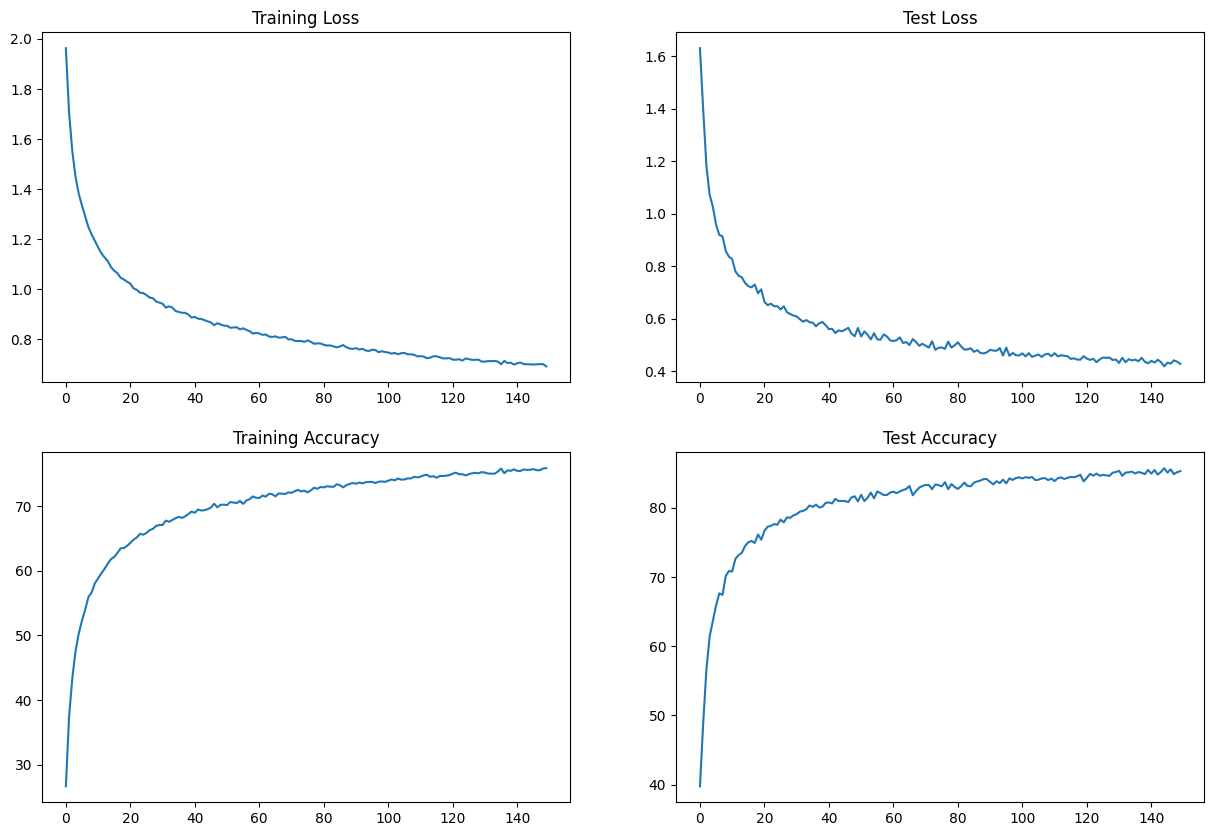

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

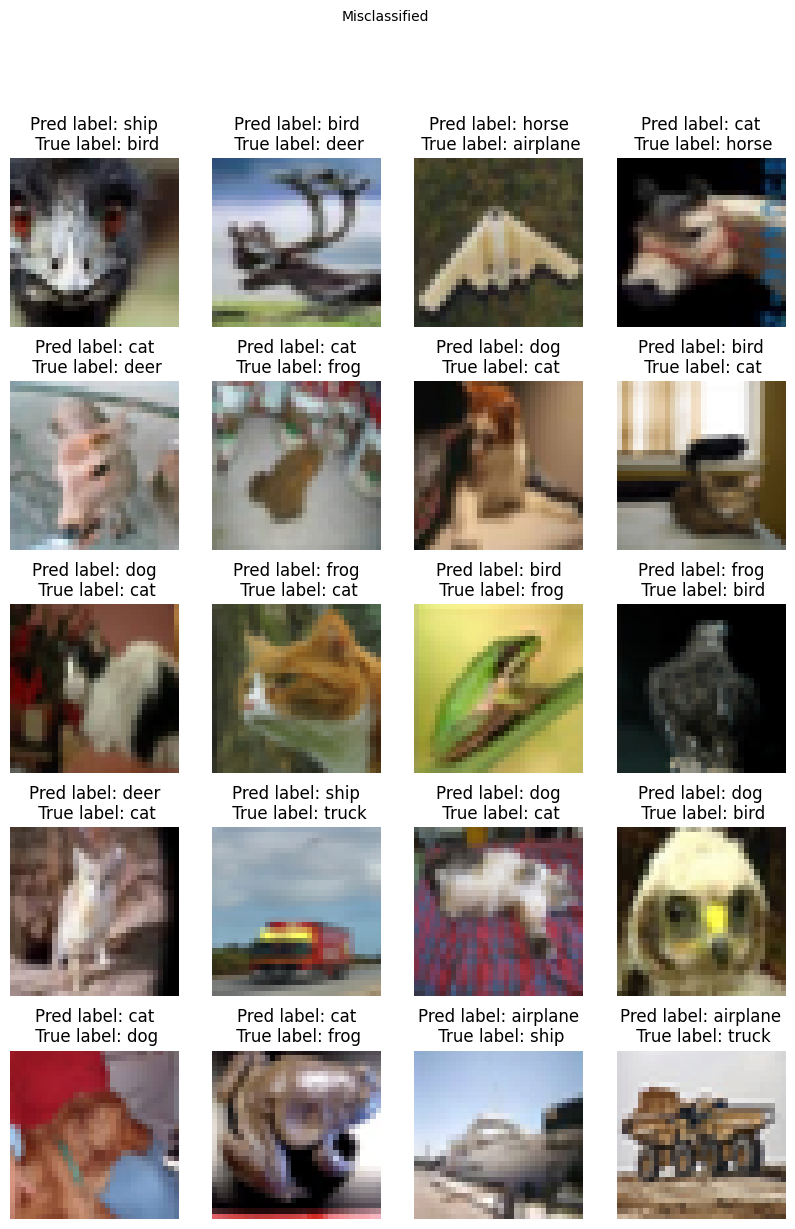

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 89 %

Accuracy of automobile : 91 %

Accuracy of  bird : 75 %

Accuracy of   cat : 70 %

Accuracy of  deer : 82 %

Accuracy of   dog : 78 %

Accuracy of  frog : 88 %

Accuracy of horse : 89 %

Accuracy of  ship : 93 %

Accuracy of truck : 94 %
{'airplane': 89.0728476821192, 'automobile': 91.63879598662207, 'bird': 75.89285714285714, 'cat': 70.45454545454545, 'deer': 82.55451713395638, 'dog': 78.27476038338658, 'frog': 88.48684210526316, 'horse': 89.1025641025641, 'ship': 93.65079365079364, 'truck': 94.0625}


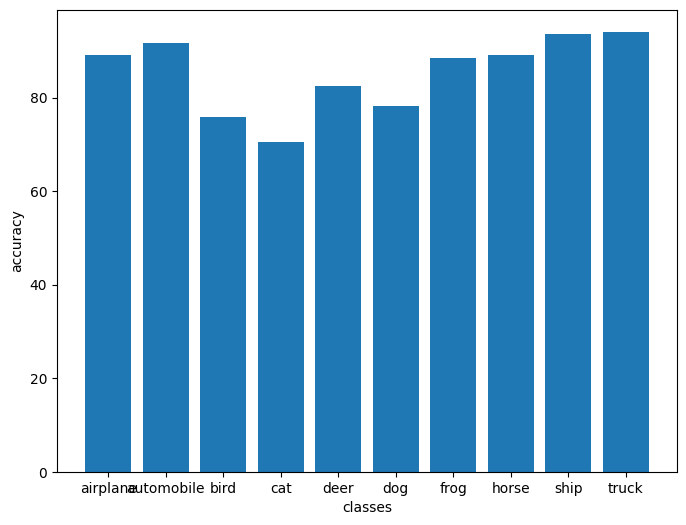

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)

In [13]:
torch.save(model.state_dict(), "cifar_85.pth")